In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings('ignore')

import os

In [2]:
df=pd.read_csv('data.csv')
df.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6,90,grid,250,80,40,abs,100,92,5,0.7


## Roughness 

### Preprocession steps

|Sr.No.| Step | Option 1 | Option 2 |
|---| --- | --- | --- |
|1| Missing value | info | isnull |
|2| Encoding |  |  |
|3| Outlier | boxplot |  |
|4| Feature scaling |  |  |
|5| Imbalance |  |  |

In [3]:
# Missing value 
df.isnull().sum()

layer_height          0
wall_thickness        0
infill_density        0
infill_pattern        0
nozzle_temperature    0
bed_temperature       0
print_speed           0
material              0
fan_speed             0
roughness             0
tension_strenght      0
elongation            0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   layer_height        50 non-null     float64
 1   wall_thickness      50 non-null     int64  
 2   infill_density      50 non-null     int64  
 3   infill_pattern      50 non-null     object 
 4   nozzle_temperature  50 non-null     int64  
 5   bed_temperature     50 non-null     int64  
 6   print_speed         50 non-null     int64  
 7   material            50 non-null     object 
 8   fan_speed           50 non-null     int64  
 9   roughness           50 non-null     int64  
 10  tension_strenght    50 non-null     int64  
 11  elongation          50 non-null     float64
dtypes: float64(2), int64(8), object(2)
memory usage: 4.8+ KB


In [5]:
# Encoding
df['material'].value_counts()

abs    25
pla    25
Name: material, dtype: int64

In [6]:
# Convert 'material' column from object to int
df['material']= df['material'].astype('category')
df['material']= df['material'].cat.codes

In [7]:
df= pd.get_dummies(df, columns=['material'])

In [8]:
df

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strenght,elongation,material_0,material_1
0,0.02,8,90,grid,220,60,40,0,25,18,1.2,1,0
1,0.02,7,90,honeycomb,225,65,40,25,32,16,1.4,1,0
2,0.02,1,80,grid,230,70,40,50,40,8,0.8,1,0
3,0.02,4,70,honeycomb,240,75,40,75,68,10,0.5,1,0
4,0.02,6,90,grid,250,80,40,100,92,5,0.7,1,0
5,0.02,10,40,honeycomb,200,60,40,0,60,24,1.1,0,1
6,0.02,5,10,grid,205,65,40,25,55,12,1.3,0,1
7,0.02,10,10,honeycomb,210,70,40,50,21,14,1.5,0,1
8,0.02,9,70,grid,215,75,40,75,24,27,1.4,0,1
9,0.02,8,40,honeycomb,220,80,40,100,30,25,1.7,0,1


In [9]:
# Convert 'infill_pattern' column from object to int
df['infill_pattern']= df['infill_pattern'].astype('category')
df['infill_pattern']= df['infill_pattern'].cat.codes
df= pd.get_dummies(df, columns=['infill_pattern'])
df

,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strenght,elongation,material_0,material_1,infill_pattern_0,infill_pattern_1
0,0.02,8,90,220,60,40,0,25,18,1.2,1,0,1,0
1,0.02,7,90,225,65,40,25,32,16,1.4,1,0,0,1
2,0.02,1,80,230,70,40,50,40,8,0.8,1,0,1,0
3,0.02,4,70,240,75,40,75,68,10,0.5,1,0,0,1
4,0.02,6,90,250,80,40,100,92,5,0.7,1,0,1,0
5,0.02,10,40,200,60,40,0,60,24,1.1,0,1,0,1
6,0.02,5,10,205,65,40,25,55,12,1.3,0,1,1,0
7,0.02,10,10,210,70,40,50,21,14,1.5,0,1,0,1
8,0.02,9,70,215,75,40,75,24,27,1.4,0,1,1,0
9,0.02,8,40,220,80,40,100,30,25,1.7,0,1,0,1


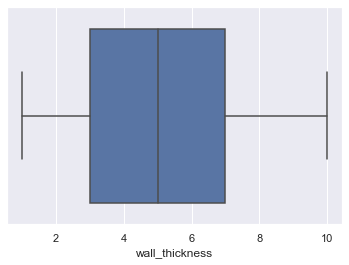

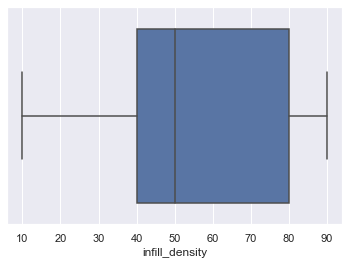

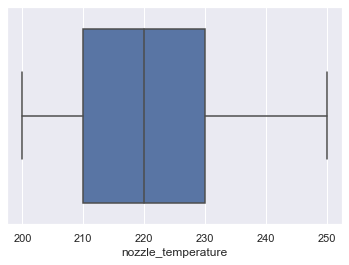

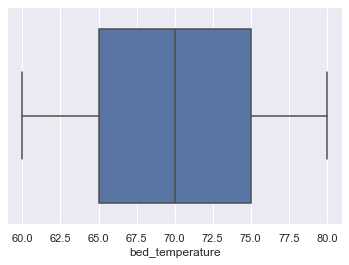

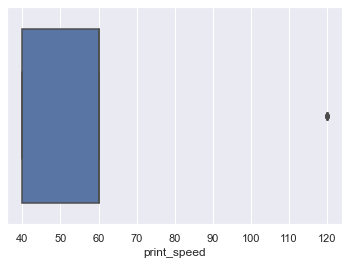

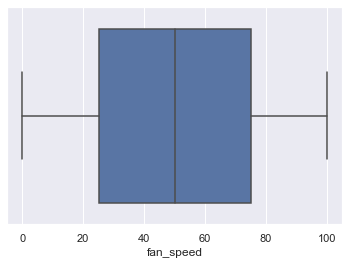

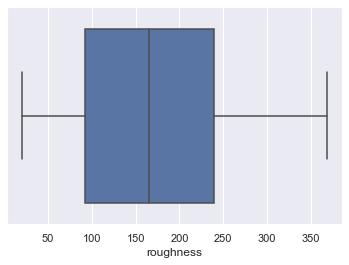

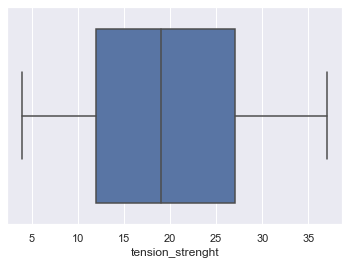

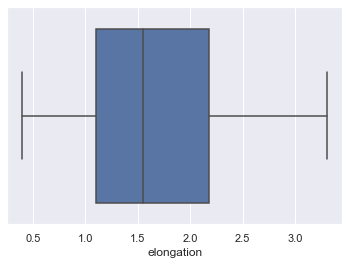

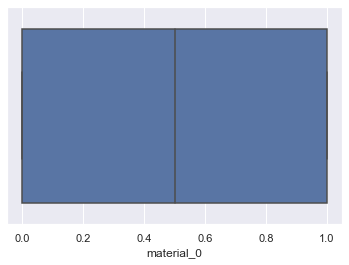

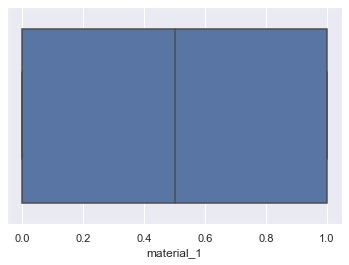

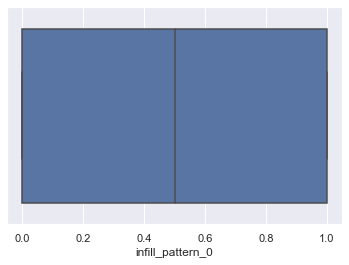

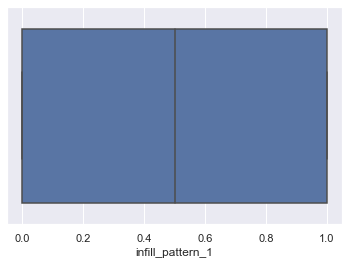

In [10]:
# outlier detection
def boxplot(col):
    sns.boxplot(df[col])
    plt.show()

for i in list(df.columns)[1:]:
    boxplot(i)

<AxesSubplot:xlabel='roughness', ylabel='Density'>

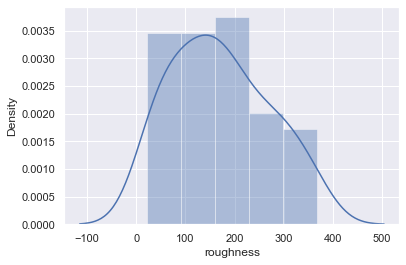

In [11]:
# Check distribution of dependent variable
sns.distplot(df['roughness'])

<AxesSubplot:>

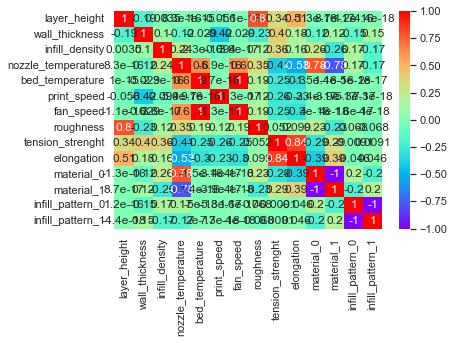

In [12]:
# Check multi collinearity
sns.heatmap(df.corr(), annot=True, cmap='rainbow')

In [13]:
df.columns

Index(['layer_height', 'wall_thickness', 'infill_density',
       'nozzle_temperature', 'bed_temperature', 'print_speed', 'fan_speed',
       'roughness', 'tension_strenght', 'elongation', 'material_0',
       'material_1', 'infill_pattern_0', 'infill_pattern_1'],
      dtype='object')

In [14]:
# Split df into x and y
x= df[['layer_height', 'wall_thickness', 'infill_density', 'nozzle_temperature','bed_temperature', 'print_speed', 'fan_speed','material_0', 'infill_pattern_0' ]]
y= df['roughness']

In [15]:
x

,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,print_speed,fan_speed,material_0,infill_pattern_0
0,0.02,8,90,220,60,40,0,1,1
1,0.02,7,90,225,65,40,25,1,0
2,0.02,1,80,230,70,40,50,1,1
3,0.02,4,70,240,75,40,75,1,0
4,0.02,6,90,250,80,40,100,1,1
5,0.02,10,40,200,60,40,0,0,0
6,0.02,5,10,205,65,40,25,0,1
7,0.02,10,10,210,70,40,50,0,0
8,0.02,9,70,215,75,40,75,0,1
9,0.02,8,40,220,80,40,100,0,0


In [16]:
y

0      25
1      32
2      40
3      68
4      92
5      60
6      55
7      21
8      24
9      30
10     75
11     92
12    118
13    200
14    220
15    126
16    145
17     88
18     92
19     74
20    120
21    144
22    265
23    312
24    368
25    180
26    176
27    128
28    138
29    121
30    168
31    154
32    225
33    289
34    326
35    192
36    212
37    168
38    172
39    163
40    212
41    276
42    298
43    360
44    357
45    321
46    265
47    278
48    244
49    220
Name: roughness, dtype: int64

In [17]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_scaled= scaler.fit_transform(x)

In [18]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable= x_scaled

vif= pd.DataFrame()
vif['VIF']=[variance_inflation_factor(variable,i) for i in range(variable.shape[1])]
vif['Features']= x.columns
vif

,VIF,Features
0,1.067264,layer_height
1,1.371753,wall_thickness
2,1.180552,infill_density
3,47.069693,nozzle_temperature
4,inf,bed_temperature
5,1.253881,print_speed
6,inf,fan_speed
7,29.112041,material_0
8,1.087509,infill_pattern_0


For nozzle_temperature, bed_temperature, material_0 and fan_speed, VIF is greater than 5. So, there is multi collinearuty. Thus, these 4 variables should be droped.

In [19]:
x= df[['layer_height', 'wall_thickness', 'infill_density', 'print_speed', 'infill_pattern_0' ]]

In [20]:
# Split data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, train_size=0.8, random_state=1)

In [21]:
# Build a linear model by OLS

from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [22]:
reg_model= smf.OLS(endog= y_train, exog= x_train).fit()
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              roughness   R-squared (uncentered):                   0.924
Model:                            OLS   Adj. R-squared (uncentered):              0.914
Method:                 Least Squares   F-statistic:                              85.62
Date:                Thu, 22 Dec 2022   Prob (F-statistic):                    1.29e-18
Time:                        08:46:11   Log-Likelihood:                         -217.45
No. Observations:                  40   AIC:                                      444.9
Df Residuals:                      35   BIC:                                      453.3
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
layer_height      1291.9655    140.842      9.173      0.000    1006.041    1577.890
wall_thickness      -2.4422      2.745     -0.890      0.380      -8.014       3.130
infill_density       0.4083      0.399      1.024      0.313      -0.402       1.218
print_speed          0.5132      0.259      1.981      0.056      -0.013       1.039
infill_pattern_0     5.9703     19.567      0.305      0.762     -33.753      45.693
==============================================================================
Omnibus:                        4.224   Durbin-Watson:                   1.364
Prob(Omnibus):                  0.121   Jarque-Bera (JB):                3.416
Skew:                           0.714   Prob(JB):                        0.181
Kurtosis:                       3.112   Cond. No.                     1.33e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [24]:
y_pred_train= model.predict(x_train)
y_pred_test= model.predict(x_test)

from sklearn.metrics import r2_score

print(r2_score(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test))

0.7163078483394238
0.2686739315125536


- Auto correlation value is not between 1.5 to 2.5, so there is Auto correlation (Durbin-Watson test).
- Wall thickness, Infill density and infill_pattern_0 are insignificant. So, these 3 variables should be removed before building model

In [25]:
# Build Linear Regression Model by removing Wall thickness, Infill density and infill_pattern_0 from x

x= df[['layer_height', 'print_speed' ]]

In [26]:
# Split data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, train_size=0.8, random_state=1)

# Build a linear model by OLS

from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

reg_model= smf.OLS(endog= y_train, exog= x_train).fit()
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              roughness   R-squared (uncentered):                   0.921
Model:                            OLS   Adj. R-squared (uncentered):              0.917
Method:                 Least Squares   F-statistic:                              221.4
Date:                Thu, 22 Dec 2022   Prob (F-statistic):                    1.14e-21
Time:                        08:46:12   Log-Likelihood:                         -218.34
No. Observations:                  40   AIC:                                      440.7
Df Residuals:                      38   BIC:                                      444.1
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
layer_height  1339.7499    122.572     10.930      0.000    1091.615    1587.884
print_speed      0.6204      0.204      3.037      0.004       0.207       1.034
==============================================================================
Omnibus:                        4.749   Durbin-Watson:                   1.313
Prob(Omnibus):                  0.093   Jarque-Bera (JB):                3.992
Skew:                           0.773   Prob(JB):                        0.136
Kurtosis:                       3.084   Cond. No.                         941.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [28]:
y_pred_train_updated= model.predict(x_train)
y_pred_test_updated= model.predict(x_test)

from sklearn.metrics import r2_score

print(r2_score(y_train, y_pred_train_updated))
print(r2_score(y_test, y_pred_test_updated))

0.7017903346661357
0.1788796322081022


In [49]:
# Random forest regressor
from sklearn.ensemble import RandomForestRegressor

In [50]:
rf= RandomForestRegressor(n_estimators=100)
rf.fit(x_train, y_train)

RandomForestRegressor()

In [52]:
y_pred_train_rf= rf.predict(x_train)
y_pred_test_rf= rf.predict(x_test)
print(r2_score(y_train, y_pred_train_rf))
print('..........................')
print(r2_score(y_test, y_pred_test_rf))

0.7090723189238965
..........................
0.2467724291464285


### Checks

|Sr.No.| Step | Requirement | Decision |
|---| --- | --- | --- |
|1| Adjusted R2 | >70 | Ok |
|2| Check p-value | <0.05 | Ok  |
|3| No heteroscadicity |  | Ok |
|4| No auto correlation | Durbin-Watson test 1.5-2.5 | Not Ok |
|5| No multi collinearity | VIF<5 | Ok |

## Lazipredict¶

In [29]:
from lazypredict.Supervised import LazyRegressor

clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x_train, x_test, y_train, y_test)

print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:01<00:00, 36.25it/s]

                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
GammaRegressor                               0.57       0.66  39.93   
PassiveAggressiveRegressor                   0.44       0.57  45.31   
TweedieRegressor                             0.42       0.55  46.28   
ElasticNet                                   0.40       0.54  46.92   
HuberRegressor                               0.25       0.42  52.55   
LassoCV                                      0.16       0.35  55.57   
LassoLars                                    0.14       0.33  56.46   
ElasticNetCV                                 0.10       0.30  57.53   
OrthogonalMatchingPursuitCV                  0.03       0.25  59.71   
OrthogonalMatchingPursuit                    0.03       0.25  59.71   
GradientBoostingRegressor                    0.00       0.22  60.68   
GaussianProcessRegressor                     0.00       0.22  60.69   
XGBReg

### Conclusion
- Except auto correlation, all checks are Ok. So, Linear regression model is not good for prediction.
- From Lazipredict, it is seen that for all algorithms, Adj R2<70. So, reject all models.

## Tension strength

In [31]:
df=pd.read_csv('data.csv')
df.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,grid,220,60,40,abs,0,25,18,1.20
1,0.02,7,90,honeycomb,225,65,40,abs,25,32,16,1.40
2,0.02,1,80,grid,230,70,40,abs,50,40,8,0.80
3,0.02,4,70,honeycomb,240,75,40,abs,75,68,10,0.50
4,0.02,6,90,grid,250,80,40,abs,100,92,5,0.70


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   layer_height        50 non-null     float64
 1   wall_thickness      50 non-null     int64  
 2   infill_density      50 non-null     int64  
 3   infill_pattern      50 non-null     object 
 4   nozzle_temperature  50 non-null     int64  
 5   bed_temperature     50 non-null     int64  
 6   print_speed         50 non-null     int64  
 7   material            50 non-null     object 
 8   fan_speed           50 non-null     int64  
 9   roughness           50 non-null     int64  
 10  tension_strenght    50 non-null     int64  
 11  elongation          50 non-null     float64
dtypes: float64(2), int64(8), object(2)
memory usage: 4.8+ KB


In [33]:
# Convert 'material' column from object to int
df['material']= df['material'].astype('category')
df['material']= df['material'].cat.codes
df= pd.get_dummies(df, columns=['material'])

# Convert 'infill_pattern' column from object to int
df['infill_pattern']= df['infill_pattern'].astype('category')
df['infill_pattern']= df['infill_pattern'].cat.codes
df= pd.get_dummies(df, columns=['infill_pattern'])
df

,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strenght,elongation,material_0,material_1,infill_pattern_0,infill_pattern_1
0,0.02,8,90,220,60,40,0,25,18,1.20,1,0,1,0
1,0.02,7,90,225,65,40,25,32,16,1.40,1,0,0,1
2,0.02,1,80,230,70,40,50,40,8,0.80,1,0,1,0
3,0.02,4,70,240,75,40,75,68,10,0.50,1,0,0,1
4,0.02,6,90,250,80,40,100,92,5,0.70,1,0,1,0
5,0.02,10,40,200,60,40,0,60,24,1.10,0,1,0,1
6,0.02,5,10,205,65,40,25,55,12,1.30,0,1,1,0
7,0.02,10,10,210,70,40,50,21,14,1.50,0,1,0,1
8,0.02,9,70,215,75,40,75,24,27,1.40,0,1,1,0
9,0.02,8,40,220,80,40,100,30,25,1.70,0,1,0,1


In [34]:
df.columns

Index(['layer_height', 'wall_thickness', 'infill_density',
       'nozzle_temperature', 'bed_temperature', 'print_speed', 'fan_speed',
       'roughness', 'tension_strenght', 'elongation', 'material_0',
       'material_1', 'infill_pattern_0', 'infill_pattern_1'],
      dtype='object')

In [37]:
x1= df[['layer_height', 'wall_thickness', 'infill_density',
       'nozzle_temperature', 'bed_temperature', 'print_speed', 'fan_speed',
       'material_0', 'infill_pattern_0']]

In [38]:
x1.head()

,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,print_speed,fan_speed,material_0,infill_pattern_0
0,0.02,8,90,220,60,40,0,1,1
1,0.02,7,90,225,65,40,25,1,0
2,0.02,1,80,230,70,40,50,1,1
3,0.02,4,70,240,75,40,75,1,0
4,0.02,6,90,250,80,40,100,1,1


In [39]:
y1= df[['tension_strenght']]
y1.head()

,tension_strenght
0,18
1,16
2,8
3,10
4,5


<AxesSubplot:xlabel='tension_strenght', ylabel='Density'>

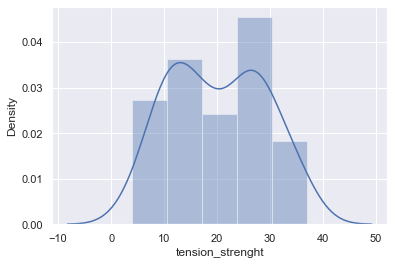

In [40]:
# Check distribution of dependent variable
sns.distplot(df['tension_strenght'])

In [41]:
# Check VIF
x1_scaled= scaler.fit_transform(x1)

variable= x1_scaled

vif= pd.DataFrame()
vif['VIF']=[variance_inflation_factor(variable,i) for i in range(variable.shape[1])]
vif['Features']= x1.columns
vif

,VIF,Features
0,1.07,layer_height
1,1.37,wall_thickness
2,1.18,infill_density
3,47.07,nozzle_temperature
4,inf,bed_temperature
5,1.25,print_speed
6,inf,fan_speed
7,29.11,material_0
8,1.09,infill_pattern_0


Columns with VIF>5 are nozzle_temperature, material_0, bed_temperature, and fan_speed. We should drop them.

In [75]:
x1= df[['layer_height', 'wall_thickness', 'infill_density',
       'print_speed',
       'infill_pattern_0']]

In [76]:
# Split data into train and test
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test= train_test_split(x1, y1, train_size=0.8, random_state=1)

In [77]:
# Build a linear model by OLS

reg_model= smf.OLS(endog= y1_train, exog= x1_train).fit()
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       tension_strenght   R-squared (uncentered):                   0.900
Model:                            OLS   Adj. R-squared (uncentered):              0.886
Method:                 Least Squares   F-statistic:                              63.22
Date:                Thu, 22 Dec 2022   Prob (F-statistic):                    1.57e-16
Time:                        09:34:03   Log-Likelihood:                         -134.10
No. Observations:                  40   AIC:                                      278.2
Df Residuals:                      35   BIC:                                      286.6
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
layer_height        56.2967     17.530      3.211      0.003      20.709      91.884
wall_thickness       1.5527      0.342      4.545      0.000       0.859       2.246
infill_density       0.0964      0.050      1.942      0.060      -0.004       0.197
print_speed         -0.0021      0.032     -0.065      0.949      -0.068       0.063
infill_pattern_0     1.1543      2.435      0.474      0.638      -3.790       6.098
==============================================================================
Omnibus:                        0.048   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.976   Jarque-Bera (JB):                0.042
Skew:                           0.019   Prob(JB):                        0.979
Kurtosis:                       2.845   Cond. No.                     1.33e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Columns having p>0.05 are print_speed and infill_pattern_0. We should drop them.

In [78]:
x1= df[['layer_height', 'wall_thickness', 'infill_density',
       ]]

In [79]:
# Split data into train and test
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test= train_test_split(x1, y1, train_size=0.8, random_state=1)

# Build a linear model by OLS

reg_model= smf.OLS(endog= y1_train, exog= x1_train).fit()
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       tension_strenght   R-squared (uncentered):                   0.900
Model:                            OLS   Adj. R-squared (uncentered):              0.892
Method:                 Least Squares   F-statistic:                              110.6
Date:                Thu, 22 Dec 2022   Prob (F-statistic):                    1.59e-18
Time:                        09:35:41   Log-Likelihood:                         -134.23
No. Observations:                  40   AIC:                                      274.5
Df Residuals:                      37   BIC:                                      279.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
layer_height      56.0435     16.013      3.500      0.001      23.599      88.488
wall_thickness     1.5371      0.330      4.660      0.000       0.869       2.205
infill_density     0.1057      0.042      2.493      0.017       0.020       0.192
==============================================================================
Omnibus:                        0.118   Durbin-Watson:                   1.532
Prob(Omnibus):                  0.943   Jarque-Bera (JB):                0.107
Skew:                           0.097   Prob(JB):                        0.948
Kurtosis:                       2.835   Cond. No.                         842.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
y_tensile_strength= reg_model.predict(x1)

In [82]:
df['Tensile stength predicted']=y_tensile_strength
df

,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strenght,elongation,material_0,material_1,infill_pattern_0,infill_pattern_1,Tensile stength predicted
0,0.02,8,90,220,60,40,0,25,18,1.20,1,0,1,0,22.93
1,0.02,7,90,225,65,40,25,32,16,1.40,1,0,0,1,21.39
2,0.02,1,80,230,70,40,50,40,8,0.80,1,0,1,0,11.12
3,0.02,4,70,240,75,40,75,68,10,0.50,1,0,0,1,14.67
4,0.02,6,90,250,80,40,100,92,5,0.70,1,0,1,0,19.86
5,0.02,10,40,200,60,40,0,60,24,1.10,0,1,0,1,20.72
6,0.02,5,10,205,65,40,25,55,12,1.30,0,1,1,0,9.86
7,0.02,10,10,210,70,40,50,21,14,1.50,0,1,0,1,17.55
8,0.02,9,70,215,75,40,75,24,27,1.40,0,1,1,0,22.35
9,0.02,8,40,220,80,40,100,30,25,1.70,0,1,0,1,17.65


### Checks

|Sr.No.| Step | Requirement | Decision |
|---| --- | --- | --- |
|1| Adjusted R2 | >70 | Ok |
|2| Check p-value | <0.05 | Ok  |
|3| No heteroscadicity |  | Ok |
|4| No auto correlation | Durbin-Watson test 1.5-2.5 | Ok |
|5| No multi collinearity | VIF<5 | Ok |

### Conclusion
- All checks are Ok. So, Linear regression model is good for prediction.

## Elongation

In [56]:
df.head()

,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strenght,elongation,material_0,material_1,infill_pattern_0,infill_pattern_1
0,0.02,8,90,220,60,40,0,25,18,1.20,1,0,1,0
1,0.02,7,90,225,65,40,25,32,16,1.40,1,0,0,1
2,0.02,1,80,230,70,40,50,40,8,0.80,1,0,1,0
3,0.02,4,70,240,75,40,75,68,10,0.50,1,0,0,1
4,0.02,6,90,250,80,40,100,92,5,0.70,1,0,1,0


In [59]:
df.columns

Index(['layer_height', 'wall_thickness', 'infill_density',
       'nozzle_temperature', 'bed_temperature', 'print_speed', 'fan_speed',
       'roughness', 'tension_strenght', 'elongation', 'material_0',
       'material_1', 'infill_pattern_0', 'infill_pattern_1'],
      dtype='object')

In [72]:
x2= df[['layer_height', 'wall_thickness', 'infill_density',
       'nozzle_temperature', 'bed_temperature', 'print_speed', 'fan_speed',
       'material_0',
       'infill_pattern_0']]

In [73]:
y2= df[['elongation']]

<AxesSubplot:xlabel='elongation', ylabel='Density'>

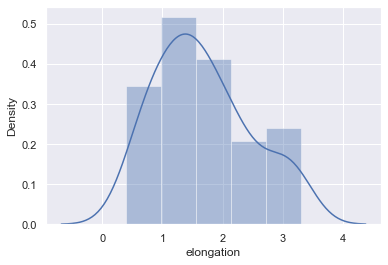

In [62]:
 # Check distribution of dependent variable
sns.distplot(df['elongation'])

In [74]:
# Check VIF
x2_scaled= scaler.fit_transform(x2)

variable= x2_scaled

vif= pd.DataFrame()
vif['VIF']=[variance_inflation_factor(variable,i) for i in range(variable.shape[1])]
vif['Features']= x2.columns
vif

,VIF,Features
0,1.07,layer_height
1,1.37,wall_thickness
2,1.18,infill_density
3,47.07,nozzle_temperature
4,inf,bed_temperature
5,1.25,print_speed
6,inf,fan_speed
7,29.11,material_0
8,1.09,infill_pattern_0


Columns with VIF>5 are nozzle_temperature, bed_temperature, fan_speed, material_0. We should drop them.

In [83]:
x2= df[['layer_height', 'wall_thickness', 'infill_density',
       'print_speed', 'infill_pattern_0']]

In [84]:
# Split data into train and test
from sklearn.model_selection import train_test_split
x2_train, x2_test, y2_train, y2_test= train_test_split(x2, y2, train_size=0.8, random_state=1)

In [85]:
# Build a linear model by OLS

reg_model= smf.OLS(endog= y2_train, exog= x2_train).fit()
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             elongation   R-squared (uncentered):                   0.864
Model:                            OLS   Adj. R-squared (uncentered):              0.844
Method:                 Least Squares   F-statistic:                              44.32
Date:                Thu, 22 Dec 2022   Prob (F-statistic):                    3.59e-14
Time:                        09:42:17   Log-Likelihood:                         -39.398
No. Observations:                  40   AIC:                                      88.80
Df Residuals:                      35   BIC:                                      97.24
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
layer_height         6.4033      1.643      3.898      0.000       3.069       9.738
wall_thickness       0.1014      0.032      3.168      0.003       0.036       0.166
infill_density       0.0055      0.005      1.183      0.245      -0.004       0.015
print_speed          0.0012      0.003      0.381      0.705      -0.005       0.007
infill_pattern_0    -0.0280      0.228     -0.123      0.903      -0.491       0.435
==============================================================================
Omnibus:                        0.494   Durbin-Watson:                   1.491
Prob(Omnibus):                  0.781   Jarque-Bera (JB):                0.608
Skew:                          -0.226   Prob(JB):                        0.738
Kurtosis:                       2.598   Cond. No.                     1.33e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Columns having p>0.05 are infill_density, print_speed, and infill_pattern_0. We should drop them

In [86]:
x2= df[['layer_height', 'wall_thickness']]

In [87]:
# Split data into train and test
from sklearn.model_selection import train_test_split
x2_train, x2_test, y2_train, y2_test= train_test_split(x2, y2, train_size=0.8, random_state=1)

# Build a linear model by OLS

reg_model= smf.OLS(endog= y2_train, exog= x2_train).fit()
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             elongation   R-squared (uncentered):                   0.855
Model:                            OLS   Adj. R-squared (uncentered):              0.847
Method:                 Least Squares   F-statistic:                              111.9
Date:                Thu, 22 Dec 2022   Prob (F-statistic):                    1.19e-16
Time:                        09:43:59   Log-Likelihood:                         -40.646
No. Observations:                  40   AIC:                                      85.29
Df Residuals:                      38   BIC:                                      88.67
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
layer_height       7.9093      1.245      6.355      0.000       5.390      10.429
wall_thickness     0.1336      0.023      5.715      0.000       0.086       0.181
==============================================================================
Omnibus:                        0.064   Durbin-Watson:                   1.556
Prob(Omnibus):                  0.968   Jarque-Bera (JB):                0.270
Skew:                           0.018   Prob(JB):                        0.874
Kurtosis:                       2.599   Cond. No.                         72.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checks

|Sr.No.| Step | Requirement | Decision |
|---| --- | --- | --- |
|1| Adjusted R2 | >70 | Ok |
|2| Check p-value | <0.05 | Ok  |
|3| No heteroscadicity |  | Ok |
|4| No auto correlation | Durbin-Watson test 1.5-2.5 | Ok |
|5| No multi collinearity | VIF<5 | Ok |

In [88]:
y_elongation= reg_model.predict(x2)

In [89]:
df['Elongation predicted']=y_elongation
df

,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strenght,elongation,material_0,material_1,infill_pattern_0,infill_pattern_1,Tensile stength predicted,Elongation predicted
0,0.02,8,90,220,60,40,0,25,18,1.20,1,0,1,0,22.93,1.23
1,0.02,7,90,225,65,40,25,32,16,1.40,1,0,0,1,21.39,1.09
2,0.02,1,80,230,70,40,50,40,8,0.80,1,0,1,0,11.12,0.29
3,0.02,4,70,240,75,40,75,68,10,0.50,1,0,0,1,14.67,0.69
4,0.02,6,90,250,80,40,100,92,5,0.70,1,0,1,0,19.86,0.96
5,0.02,10,40,200,60,40,0,60,24,1.10,0,1,0,1,20.72,1.49
6,0.02,5,10,205,65,40,25,55,12,1.30,0,1,1,0,9.86,0.83
7,0.02,10,10,210,70,40,50,21,14,1.50,0,1,0,1,17.55,1.49
8,0.02,9,70,215,75,40,75,24,27,1.40,0,1,1,0,22.35,1.36
9,0.02,8,40,220,80,40,100,30,25,1.70,0,1,0,1,17.65,1.23


### Conclusion
- All checks are Ok. So, Linear regression model is good for prediction.

### Final Conclusion
- Linear regression model is good for prediction of tensile strength and elongation.